# Filtro Gaussiano para una señal con ruido:

<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

### En este notebook se pretende ejemplificar la aplicación de un filtro gaussiano a una señal de entrada con ruido que generaremos:

### Una distrubución gaussiana, en su forma general, está descrita mediante la siguiente función de densidad de probabilidad:

<font size="5"> $G(t) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(t - \mu)^2}{2 \sigma^2})$</font>

### Dentro del área del procesamiento de señales, puede ser útil escribir la distribución gaussiana en términos de otros parámetros en lugar de la acostumbrada varianza ($\sigma ^2$) y desviación estándar ($\sigma $). Por ejemplo, en un osciloscipio puede ser útil caracterizar la señal mediante el parámetro $\mathrm{FWHM}$.

### Podemos también describir una distribución gaussiana como:

<font size="5"> $G(t) = exp(\frac{-4ln(2)t^2}{(FWHM)^2})$, mediante la relación  $FWHM=2\sigma \sqrt{2ln(2)} $</font>

### En donde $\mathrm{FWHM}$ es el intervalo entre los dos puntos donde la curva alcanza la mitad del valor máximo de $G$ (*Full Width at Half Maximum*, Ancho Completo a la Mitad del Máximo). Esta cantidad nos caracteriza el ancho y la simetría de la distribución.

# Ejercicio:

### Consideremos que la señal de entrada es la famosa señal sinusoidal de amplitud de una unidad de distancia y fase nula que hemos usado anteriormente, <font size="5"> $x(t)= sen(2 \pi 2t)$ </font>, pero suponemos que la detectamos y se encuentra alterada, pues llega con ruido. A esta señal alterada la denotamos como <font size="5"> $\chi (t)$ </font>.

### Generamos la señal de la misma forma en la que lo hemos hecho en otros notebooks:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.ndimage import gaussian_filter1d

In [12]:
# Generando el ruido y preparando el terreno para la discretización:
Fs=512 #Hz, la frecuencia de muestreo
t=np.arange(0,3, 1/Fs) #Tau [s] = 1/Fs es el periodo de muestreo
x=np.sin(2*np.pi*2*t) #Señal original 
noise=5 * np.random.randn(len(t))
x_ruido=x+noise #La señal con ruido generada va a ser una superposición del ruido y la señal original

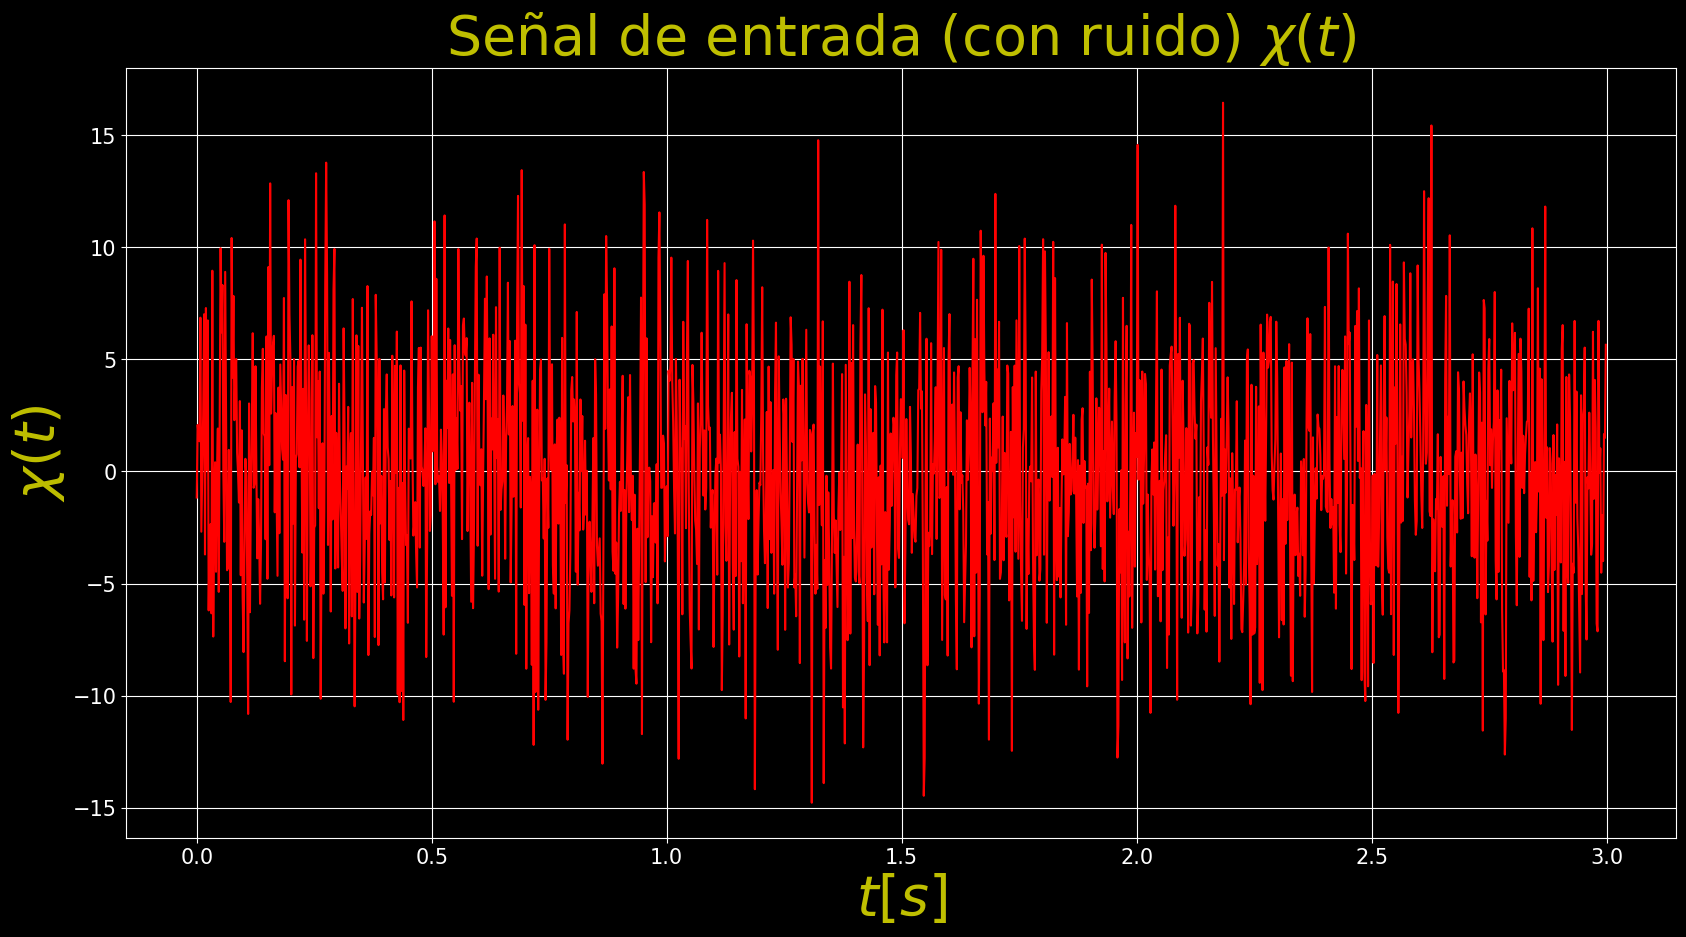

In [13]:
plt.figure(figsize = (20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,x_ruido,'r')
plt.title(r'Señal de entrada (con ruido) $\chi(t)$', color="y", fontsize = 40)
plt.xlabel('$t [s]$', color="y", fontsize = 40)
plt.ylabel('$\chi(t)$', color="y", fontsize = 40)
plt.grid(True)
plt.show()

### Para aplicar el filtro gaussiano, en este ejercicio vamos a implementar la función *gaussian_filter1d* de la biblioteca scipy.ndimage. Esta función opera el filtro de manera unidimensional sobre los datos que recibe mediante la convolución de la señal ruidosa de entrada con la función de distribución:

<font size="5"> $G(t) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{t^2}{2 \sigma^2})$</font>

### Dando una salida: 

<font size="5"> $y=\chi \diamond G$, donde $\diamond$ es el operador de convolución. </font>

### Esta función *gaussian_filter1d* recibe una señal y una desviación estándar en sus argumentos.

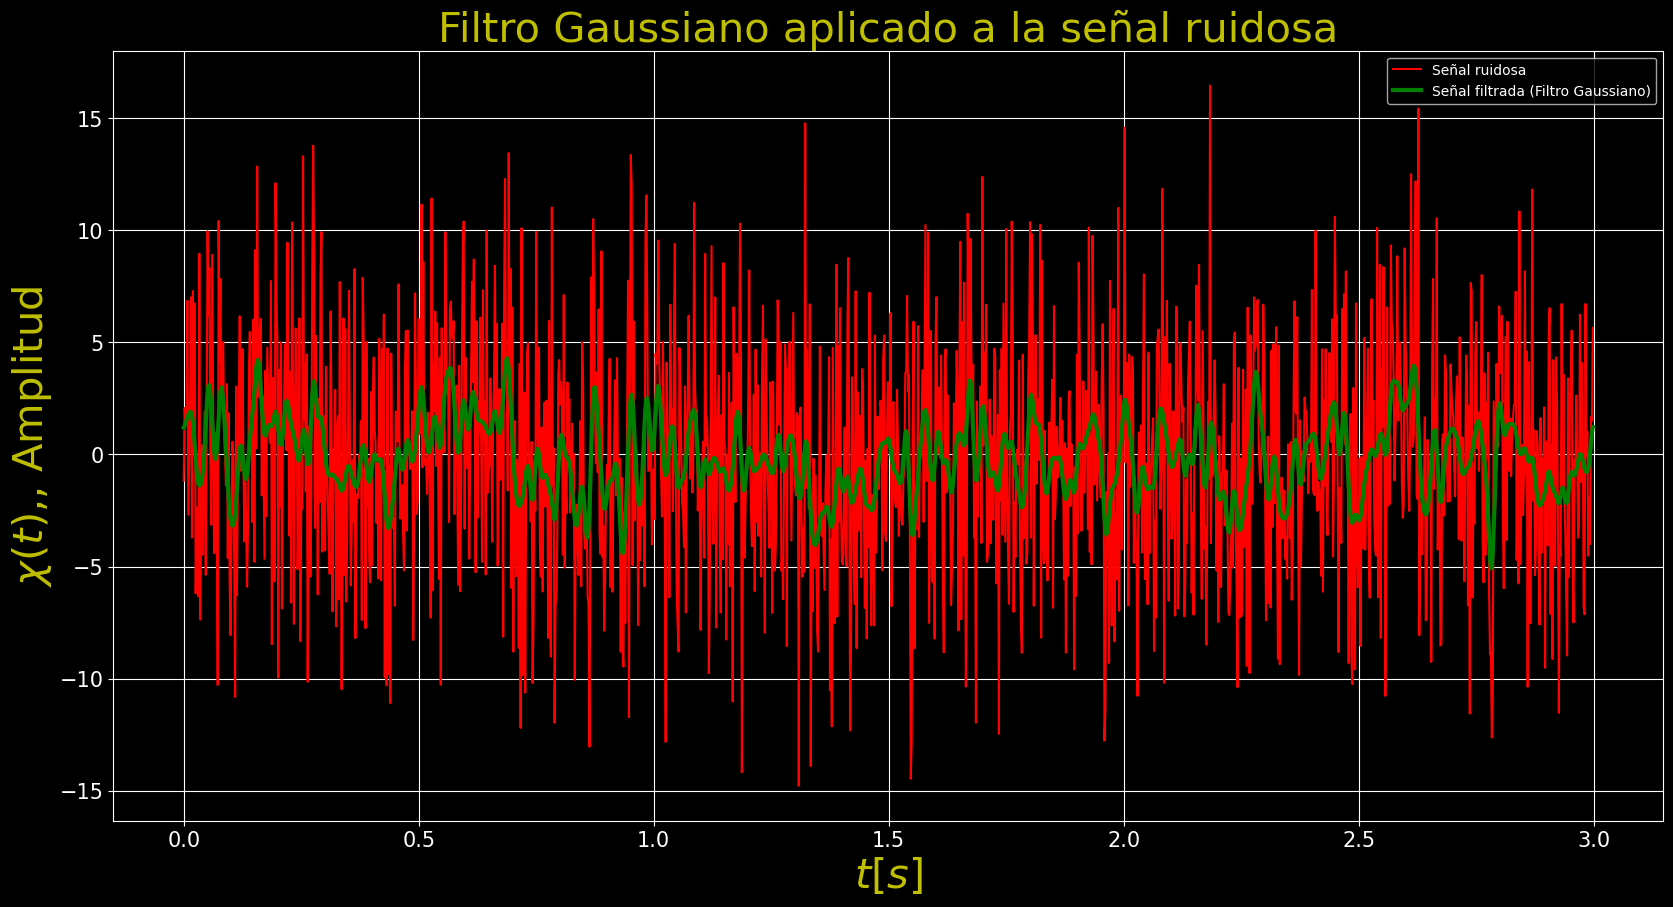

In [38]:
stdev=3
x_filtrada=gaussian_filter1d(x_ruido,stdev)
plt.figure(figsize = (20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t, x_ruido, 'r', label='Señal ruidosa')
plt.plot(t, x_filtrada, 'g', linewidth=3, label='Señal filtrada (Filtro Gaussiano)')
plt.title('Filtro Gaussiano aplicado a la señal ruidosa', fontsize=30, color="y")
plt.xlabel('$t[s]$', fontsize=30, color="y")
plt.ylabel('$\chi (t)$,, Amplitud', fontsize=30, color="y")
plt.legend()
plt.grid(True)
plt.show()

### La convención de tomar la desviación estándar como $\sigma =3s$ fue meramente cualitativa, la tomé porque se ve bastante disminuído el ruido y no parece que se pierda demasiada información sobre la señal de entrada al pasar por el filtro. El valor de $\sigma$ posiblemente podría varíar en un verdadero experimento y tener otros criterios para asignarla de acuerdo a las necesidades y condiciones en el desarrollo.

# FIN DEL EJERCICIO.